In [1]:
import glob
import numpy as np
import sys
sys.path.append('../../corv/src')

import matplotlib.pyplot as plt
from tqdm import tqdm

from astropy.io import fits
from astropy.table import Table

from astropy.coordinates import SkyCoord
import astropy.units as u

import corv

/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [2]:
"""

TODO:
    - write the actual proper fitting function with koester instead of balmer
    - make a list of good and bad plots

"""

'\n\nTODO:\n    - write the actual proper fitting function with koester instead of balmer\n    - make a list of good and bad plots\n\n'

In [3]:
files = glob.glob('CDAFB*')

  0%|                                                                                            | 0/18 [00:00<?, ?it/s]

CDAFB_WD1931p2109.0031b.0001.fits


  6%|████▌                                                                            | 1/18 [04:07<1:10:10, 247.70s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [69.98164384 95.72723493]
CDAFB_WD1928m1252.0037b.0001


 11%|█████████                                                                        | 2/18 [10:00<1:22:36, 309.78s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [32.51596936 93.57745647]
CDAFB_WDcc1847p1811.0020.0001


 17%|█████████████▌                                                                   | 3/18 [16:28<1:26:21, 345.46s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [30.79629795 89.77932714]
CDAFB_WD1931p2109.0032b.0001.fits


 22%|██████████████████                                                               | 4/18 [21:08<1:14:34, 319.61s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [76.7445925  88.03139872]
CDAFB_WDcc1847p1811.0018.0001


 28%|███████████████████████                                                            | 5/18 [21:09<44:18, 204.49s/it]

CDAFB_WD0650p3754.0031r.0002.fits


 33%|███████████████████████████▋                                                       | 6/18 [24:51<42:08, 210.71s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [31.76940953 89.11916108]
CDAFB_WD1931p2109.0032b.0002.fits


 39%|████████████████████████████████▎                                                  | 7/18 [29:59<44:26, 242.38s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [28.5037993  79.47636047]
CDAFB_WD_1847p1811.0022.0001


 44%|████████████████████████████████████▉                                              | 8/18 [30:00<27:34, 165.43s/it]

CDAFB_WDcc1847p1811.0017.0001


 50%|█████████████████████████████████████████▌                                         | 9/18 [30:00<17:04, 113.79s/it]

CDAFB_WD1931p2109.0031b.0002.fits


 61%|██████████████████████████████████████████████████                                | 11/18 [35:28<14:34, 124.96s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [31.39732172 88.3310967 ]
CDAFB_WD1847p1811.0027.0001
CDAFB_WD0650p3754.0033r.0002.fits


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [38:56<15:00, 150.08s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [36.65568692 91.57186148]
CDAFB_WD1847p1811.0024.0001


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [44:34<17:15, 207.09s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [29.6672155  88.19245609]
CDAFB_WDcc1847p1811.0019.0001
CDAFB_WD1847p1811.0025b.0001
CDAFB_WD1847p1811.0023.0001
CDAFB_WD0650p3754.0032r.0002.fits


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [47:25<01:42, 102.96s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [34.82507918 87.39453746]
CDAFB_WD1928m1252.0038b.0001


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [52:42<00:00, 175.72s/it]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [30.99065026 95.83254391]


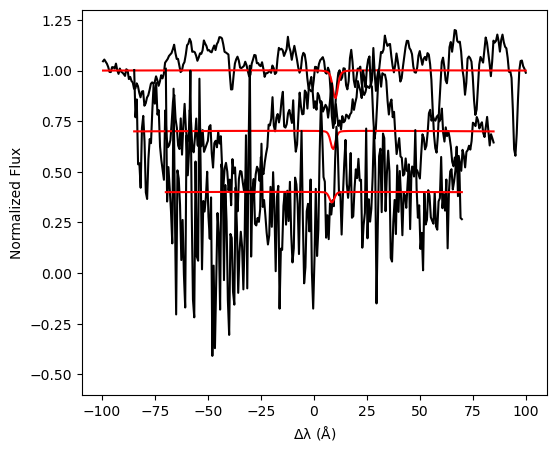

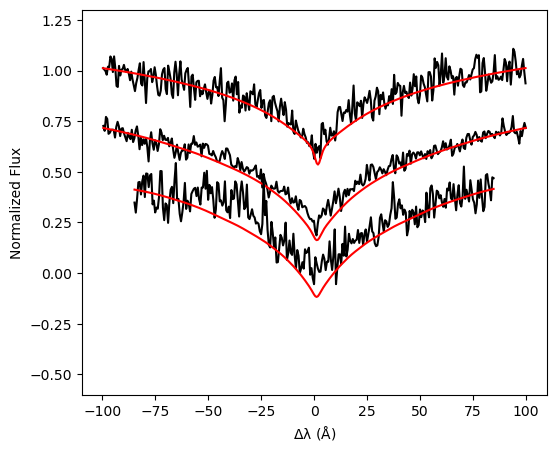

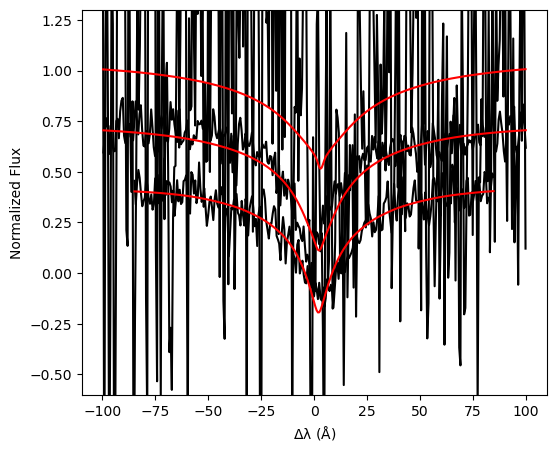

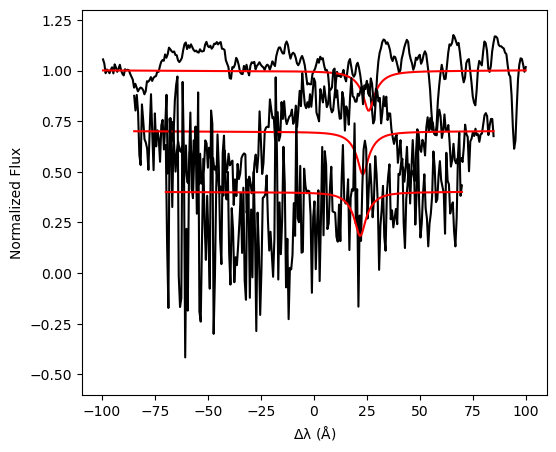

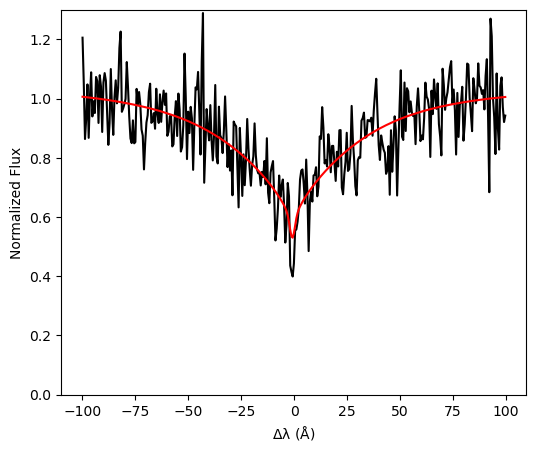

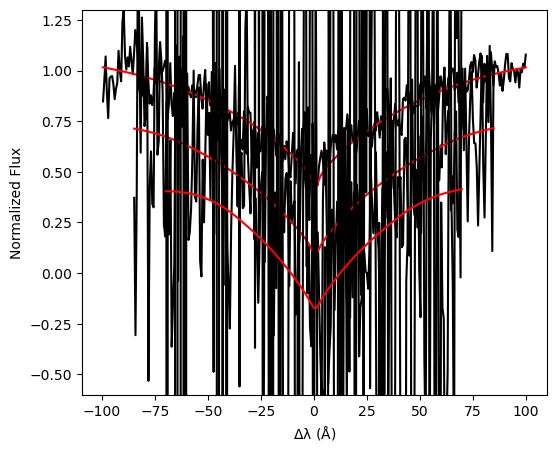

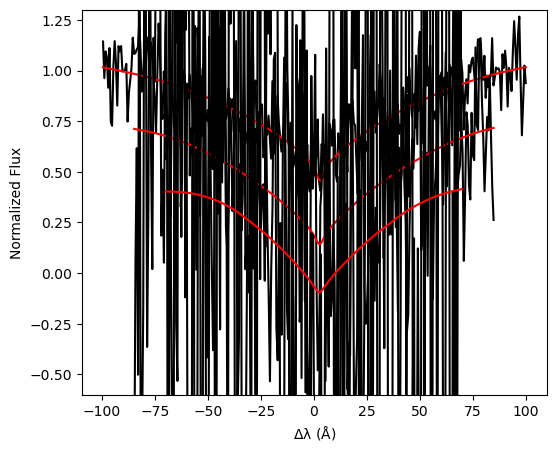

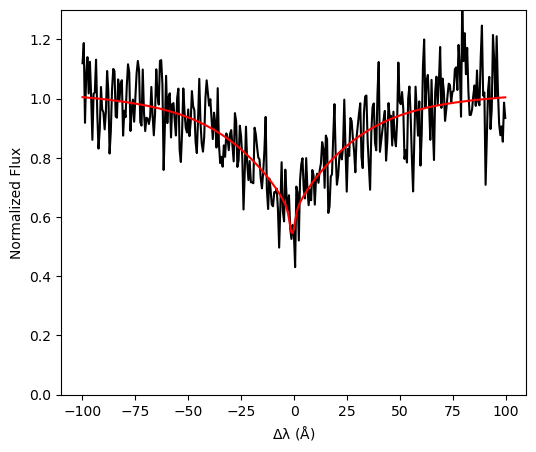

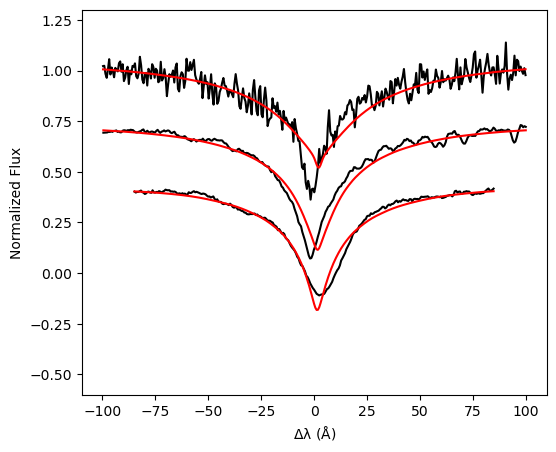

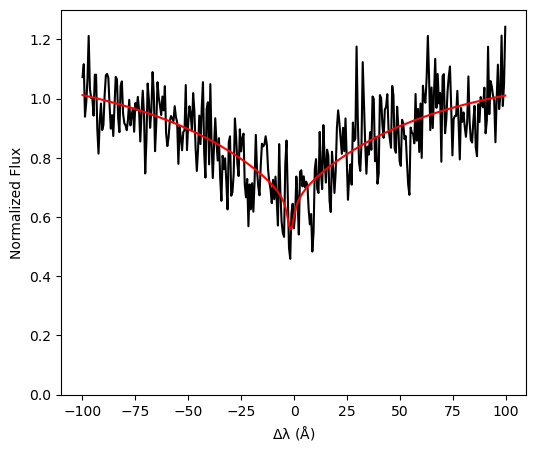

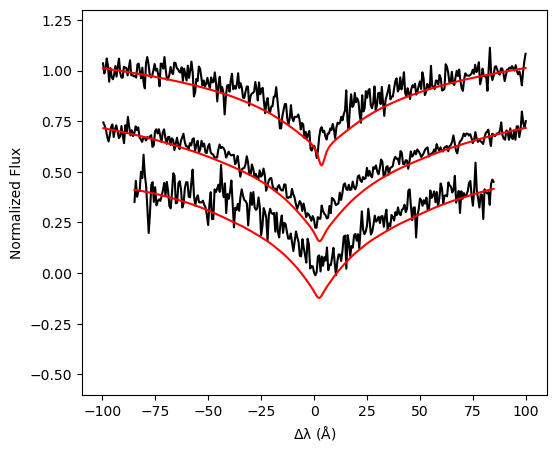

In [11]:
names = []
ras = []
decs = []
rvs = []
e_rvs = []
redchis = []

for file in tqdm(files):
    print(file)
    
    try:
        f = fits.open(file)
        
        name = f[0].header['OBJNAME']
        ra = f[0].header['RA']
        dec = f[0].header['DEC']
        
        wd_wl = f[0].header['CRVAL1'] + f[0].header['CD1_1'] * np.arange(f[0].data.shape[2])
        wd_fl = f[0].data[0,0,:]
                
        if f[0].header['DETECTOR'] == 'blue':
            corvmodel = corv.models.make_koester_model(names = ['b','g','d'])
            param_res, rv_res, rv_init = corv.fit.fit_corv(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel)
            corv.utils.lineplot(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel, rv_res.params, gap = 0.3, printparams= False,
                         figsize = (6, 5))
            
            rv = rv_res.params['RV'].value
            e_rv = rv_res.params['RV'].stderr
            redchi = rv_res.redchi
        elif f[0].header['DETECTOR'] == 'red':
            corvmodel = corv.models.make_koester_model(names = ['a'])
            param_res, rv_res, rv_init = corv.fit.fit_corv(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel)
            corv.utils.lineplot(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel, rv_res.params, gap = 0.3, printparams= False,
                         figsize = (6, 5))
            
            rv = rv_res.params['RV'].value
            e_rv = rv_res.params['RV'].stderr
            redchi = rv_res.redchi
            
        names.append(name)
        ras.append(ra)
        decs.append(dec)
        rvs.append(rv)
        e_rvs.append(e_rv)
        redchis.append(redchi)
    except:
        new_files = glob.glob(file+'/*')
        
        f1 = fits.open(new_files[0])
        f2 = fits.open(new_files[1])
        
        name = f1[0].header['OBJNAME']
        ra = f1[0].header['RA']
        dec = f1[0].header['DEC']
        
        wd_wl1 = f1[0].header['CRVAL1'] + f1[0].header['CD1_1'] * np.arange(f1[0].data.shape[2])
        wd_fl1 = f1[0].data[0,0,:]
        
        wd_wl2 = f2[0].header['CRVAL1'] + f2[0].header['CD1_1'] * np.arange(f2[0].data.shape[2])
        wd_fl2 = f2[0].data[0,0,:]
        
        wd_wl = np.concatenate((wd_wl2, wd_wl1))
        wd_fl = np.concatenate((wd_fl2, wd_fl1))
        
        try:
            corvmodel = corv.models.make_koester_model(names = ['a','b','g'])
            param_res, rv_res, rv_init = corv.fit.fit_corv(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel)
            corv.utils.lineplot(wd_wl, wd_fl, np.ones(len(wd_wl)), corvmodel, rv_res.params, printparams= False, gap = 0.3, figsize = (6, 5))
            
            rv = rv_res.params['RV'].value
            e_rv = rv_res.params['RV'].stderr
            redchi = rv_res.redchi
        except:
            rv = 999999
            e_rv = 99999
            redchi = 99999
        
        names.append(name)
        ras.append(ra)
        decs.append(dec)
        rvs.append(rv)
        e_rvs.append(e_rv)
        redchis.append(redchi)

In [12]:
decs[0]

'21:09:48.91'

In [13]:
t = Table([names, ras, decs, rvs, e_rvs, redchis], names=('name', 'wd_ra', 'wd_dec', 'wd_rv', 'wd_e_rv', 'redchi'))

In [14]:
t

name,wd_ra,wd_dec,wd_rv,wd_e_rv,redchi
str11,str11,str12,float64,float64,float64
WD1931+2109,19:31:31.06,21:09:48.91,618.4658744084745,601.50968457363,1.006189679181948
WD1928-1252,19:28:40.40,-12:52:00.97,80.59954327143,23.290647990473985,1.0020738601868757
WD1847+1811,18:47:00.51,18:11:09.26,140.31157687358314,17.162885132622634,1.0010144898050743
WD1931+2109,19:31:31.06,21:09:48.91,1588.8360319466242,1809.569643676152,0.9852746340233033
WD1847+1811,18:47:00.51,18:11:09.26,999999.0,99999.0,99999.0
WD0650+3754,6:50:23.87,37:54:38.04,-41.31879376406211,22.323752363690083,1.0026737070186598
WD1931+2109,19:31:31.06,21:09:48.91,40.92208296788766,103.75285186942816,1.0016399724366654
WD1847+1811,18:47:00.51,18:11:09.26,999999.0,99999.0,99999.0
WD1847+1811,18:47:00.51,18:11:09.26,999999.0,99999.0,99999.0


In [18]:
names = list(set(t['name']))
wd_ras = []
wd_decs = []
rvs = []
e_rvs = []
redchis = []

for name in tqdm(names):
    wd_ras.append(t[t['name'] == name]['wd_ra'][0])
    wd_decs.append(t[t['name'] == name]['wd_dec'][0])
    rv = 0
    e_rv = 0
    count = 0
    redchis.append(t[t['name'] == name]['redchi'][0])
    
    for i in range(len(t[t['name'] == name])):
        if t[t['name'] == name]['wd_e_rv'][i] < 9999:
            count += 1
            rv += t[t['name'] == name]['wd_rv'][i]
            e_rv += t[t['name'] == name]['wd_e_rv'][i]**2
            
    rv = rv / count
    e_rv = np.sqrt(e_rv)
    
    rvs.append(rv)
    e_rvs.append(e_rv)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 261.80it/s]


In [22]:
names

['WD0650+3754', 'WD1931+2109', 'WD1847+1811', 'WD1928-1252']

In [23]:
t2 = Table([names, wd_ras, wd_decs, rvs, e_rvs, redchis], names=('name', 'wd_ra', 'wd_dec', 'wd_rv', 'wd_e_rv', 'redchis'))

In [24]:
t2.write('wd_rvs.fits', overwrite=True)

In [25]:
t2

name,wd_ra,wd_dec,wd_rv,wd_e_rv,redchis
str11,str11,str12,float64,float64,float64
WD0650+3754,6:50:23.87,37:54:38.04,-53.75895756362326,48.02310511850948,1.0026737070186598
WD1931+2109,19:31:31.06,21:09:48.91,607.9939542099091,1917.1024895128257,1.006189679181948
WD1847+1811,18:47:00.51,18:11:09.26,118.61122551669456,17.923246177549036,1.0010144898050743
WD1928-1252,19:28:40.40,-12:52:00.97,120.13970659446807,38.446555505657706,1.0020738601868757
